# 1. Import Packages

In [39]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 2. Dataset

In [26]:
 df = pd.read_csv("data/stud.csv")

In [27]:
df.shape

(1000, 8)

In [28]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# 3. Data Checks

## 3.1 missing values

In [29]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

no missing vals

## 3.2 duplicates 

In [30]:
df.duplicated().sum()

0

no duplicate vals

## 3.3 data type

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 3.4 no of unique vals of each feature

In [32]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## 3.5 statistics of numerical features

In [33]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


* all means are close to each other
* SDs are also close
* min score (math = 0, reading = 17 highest, writing = 10)  

## 3.7 exploring data

In [34]:
print("categories in GENDER var:  ", end="")
print(df['gender'].unique())

print("categories in RACE_ETHNICITY var:  ", end="")
print(df['race_ethnicity'].unique())

print("categories in PARENTAL_LEVEL_OF_EDUCATION var:  ", end="")
print(df['parental_level_of_education'].unique())

print("categories in LUNCH var:  ", end="")
print(df['lunch'].unique())

print("categories in TEST_PREPARATION_COURSE var:  ", end="")
print(df['test_preparation_course'].unique())

categories in GENDER var:  ['female' 'male']
categories in RACE_ETHNICITY var:  ['group B' 'group C' 'group A' 'group D' 'group E']
categories in PARENTAL_LEVEL_OF_EDUCATION var:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in LUNCH var:  ['standard' 'free/reduced']
categories in TEST_PREPARATION_COURSE var:  ['none' 'completed']


In [36]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('len of numeric features: {}'.format(len(num_features)))
print('len of categorical features: {}'.format(len(cat_features)))

len of numeric features: 3
len of categorical features: 5


In [37]:
df['total_score'] = df['math_score']+ df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score']/3

In [38]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


# 4. data visualization

## 4.1 histogram & kde

### hist for GENDER

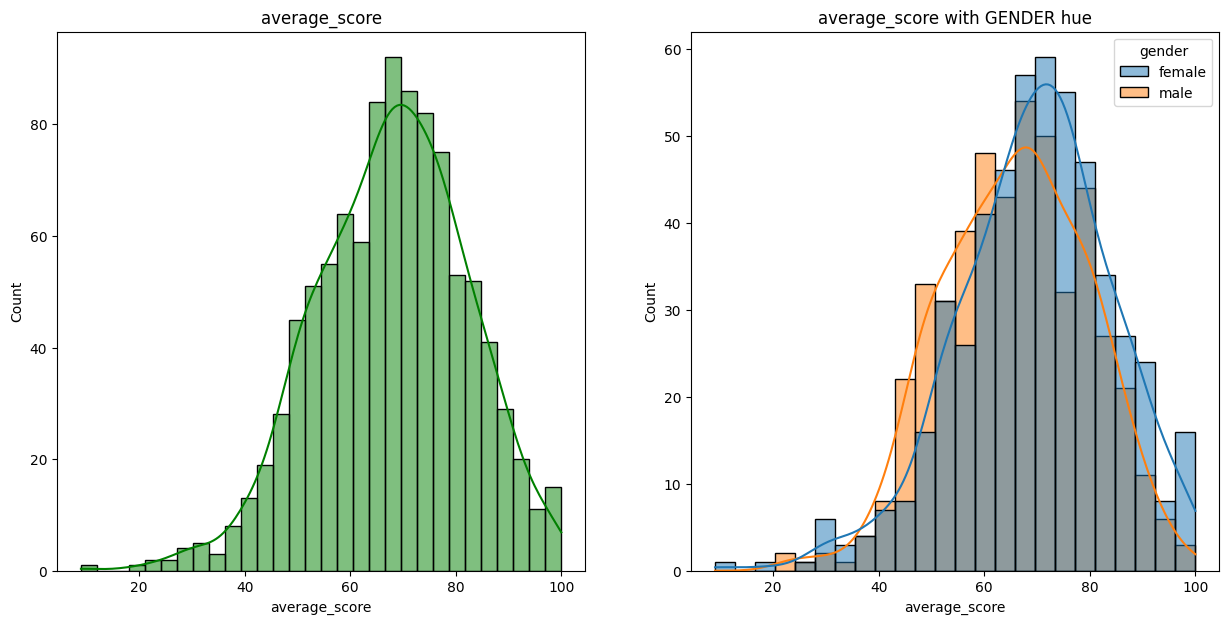

In [48]:
fig, axis = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average_score', bins=30, kde=True, color='g')
plt.title('average_score')

plt.subplot(122)
sns.histplot(data=df, x='average_score', kde=True, hue='gender')
plt.title('average_score with GENDER hue')
plt.show()

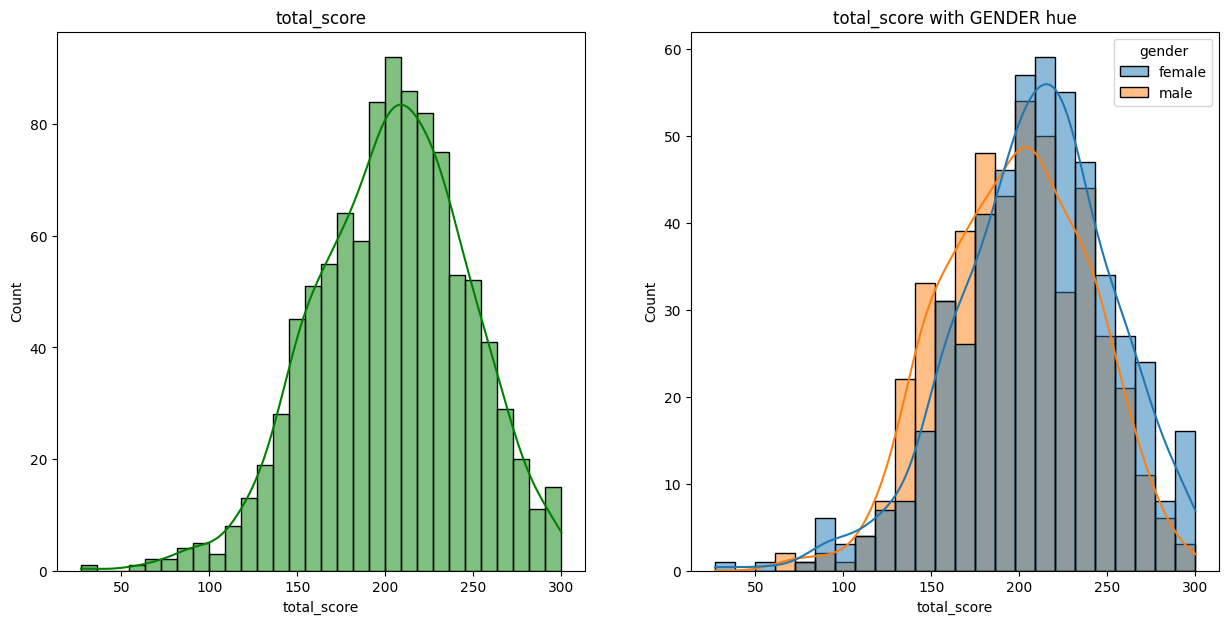

In [49]:
fig, axis = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g')
plt.title('total_score')

plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')
plt.title('total_score with GENDER hue')
plt.show()

* female students tend to perform better than male students

### hist for LUNCH

Text(0.5, 1.0, 'male')

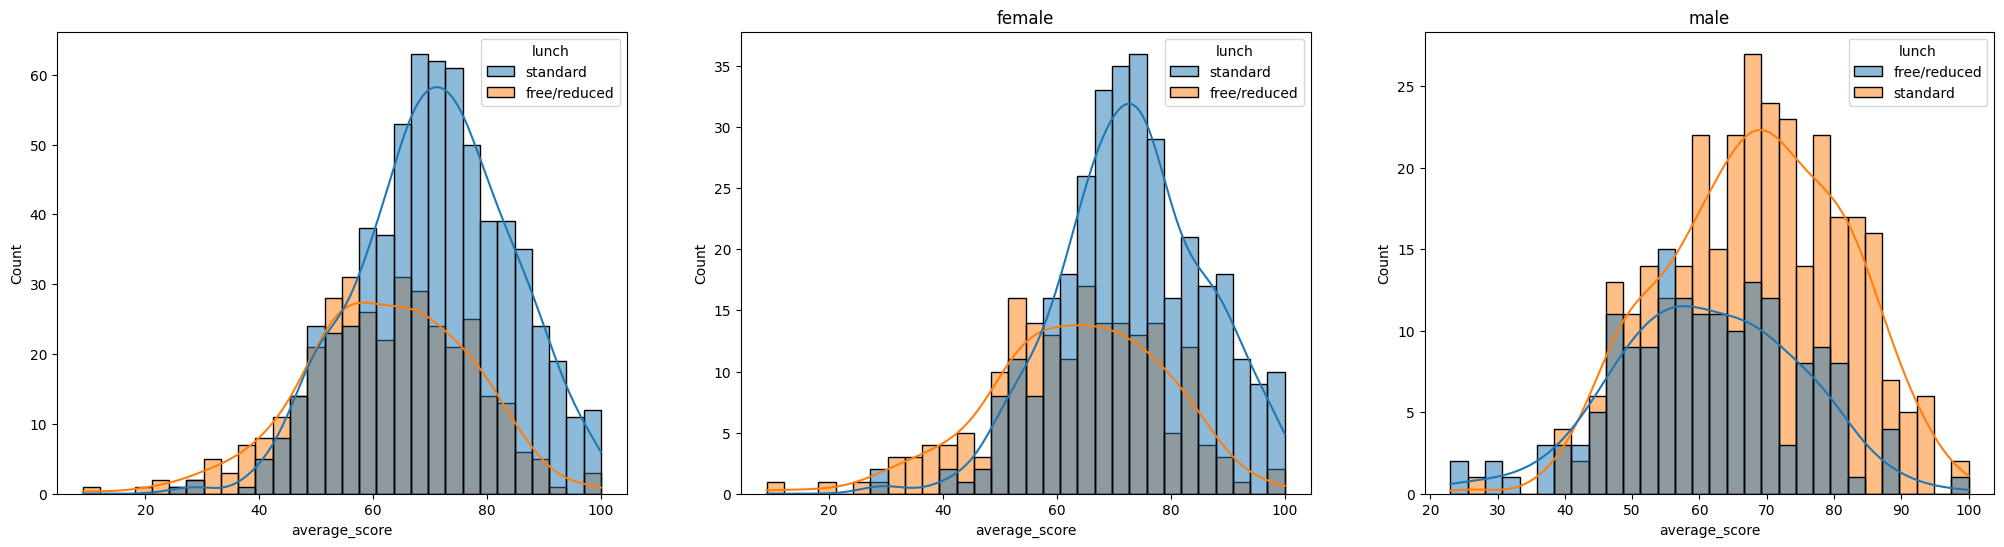

In [50]:
plt.subplots(1, 3, figsize=(25,6))

plt.subplot(131)
sns.histplot(data=df, x='average_score', bins=30, kde=True, hue='lunch')

plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average_score', bins=30, kde=True, hue='lunch')
plt.title('female')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average_score', bins=30, kde=True, hue='lunch')
plt.title('male')

### hist for parent's education

Text(0.5, 1.0, 'male')

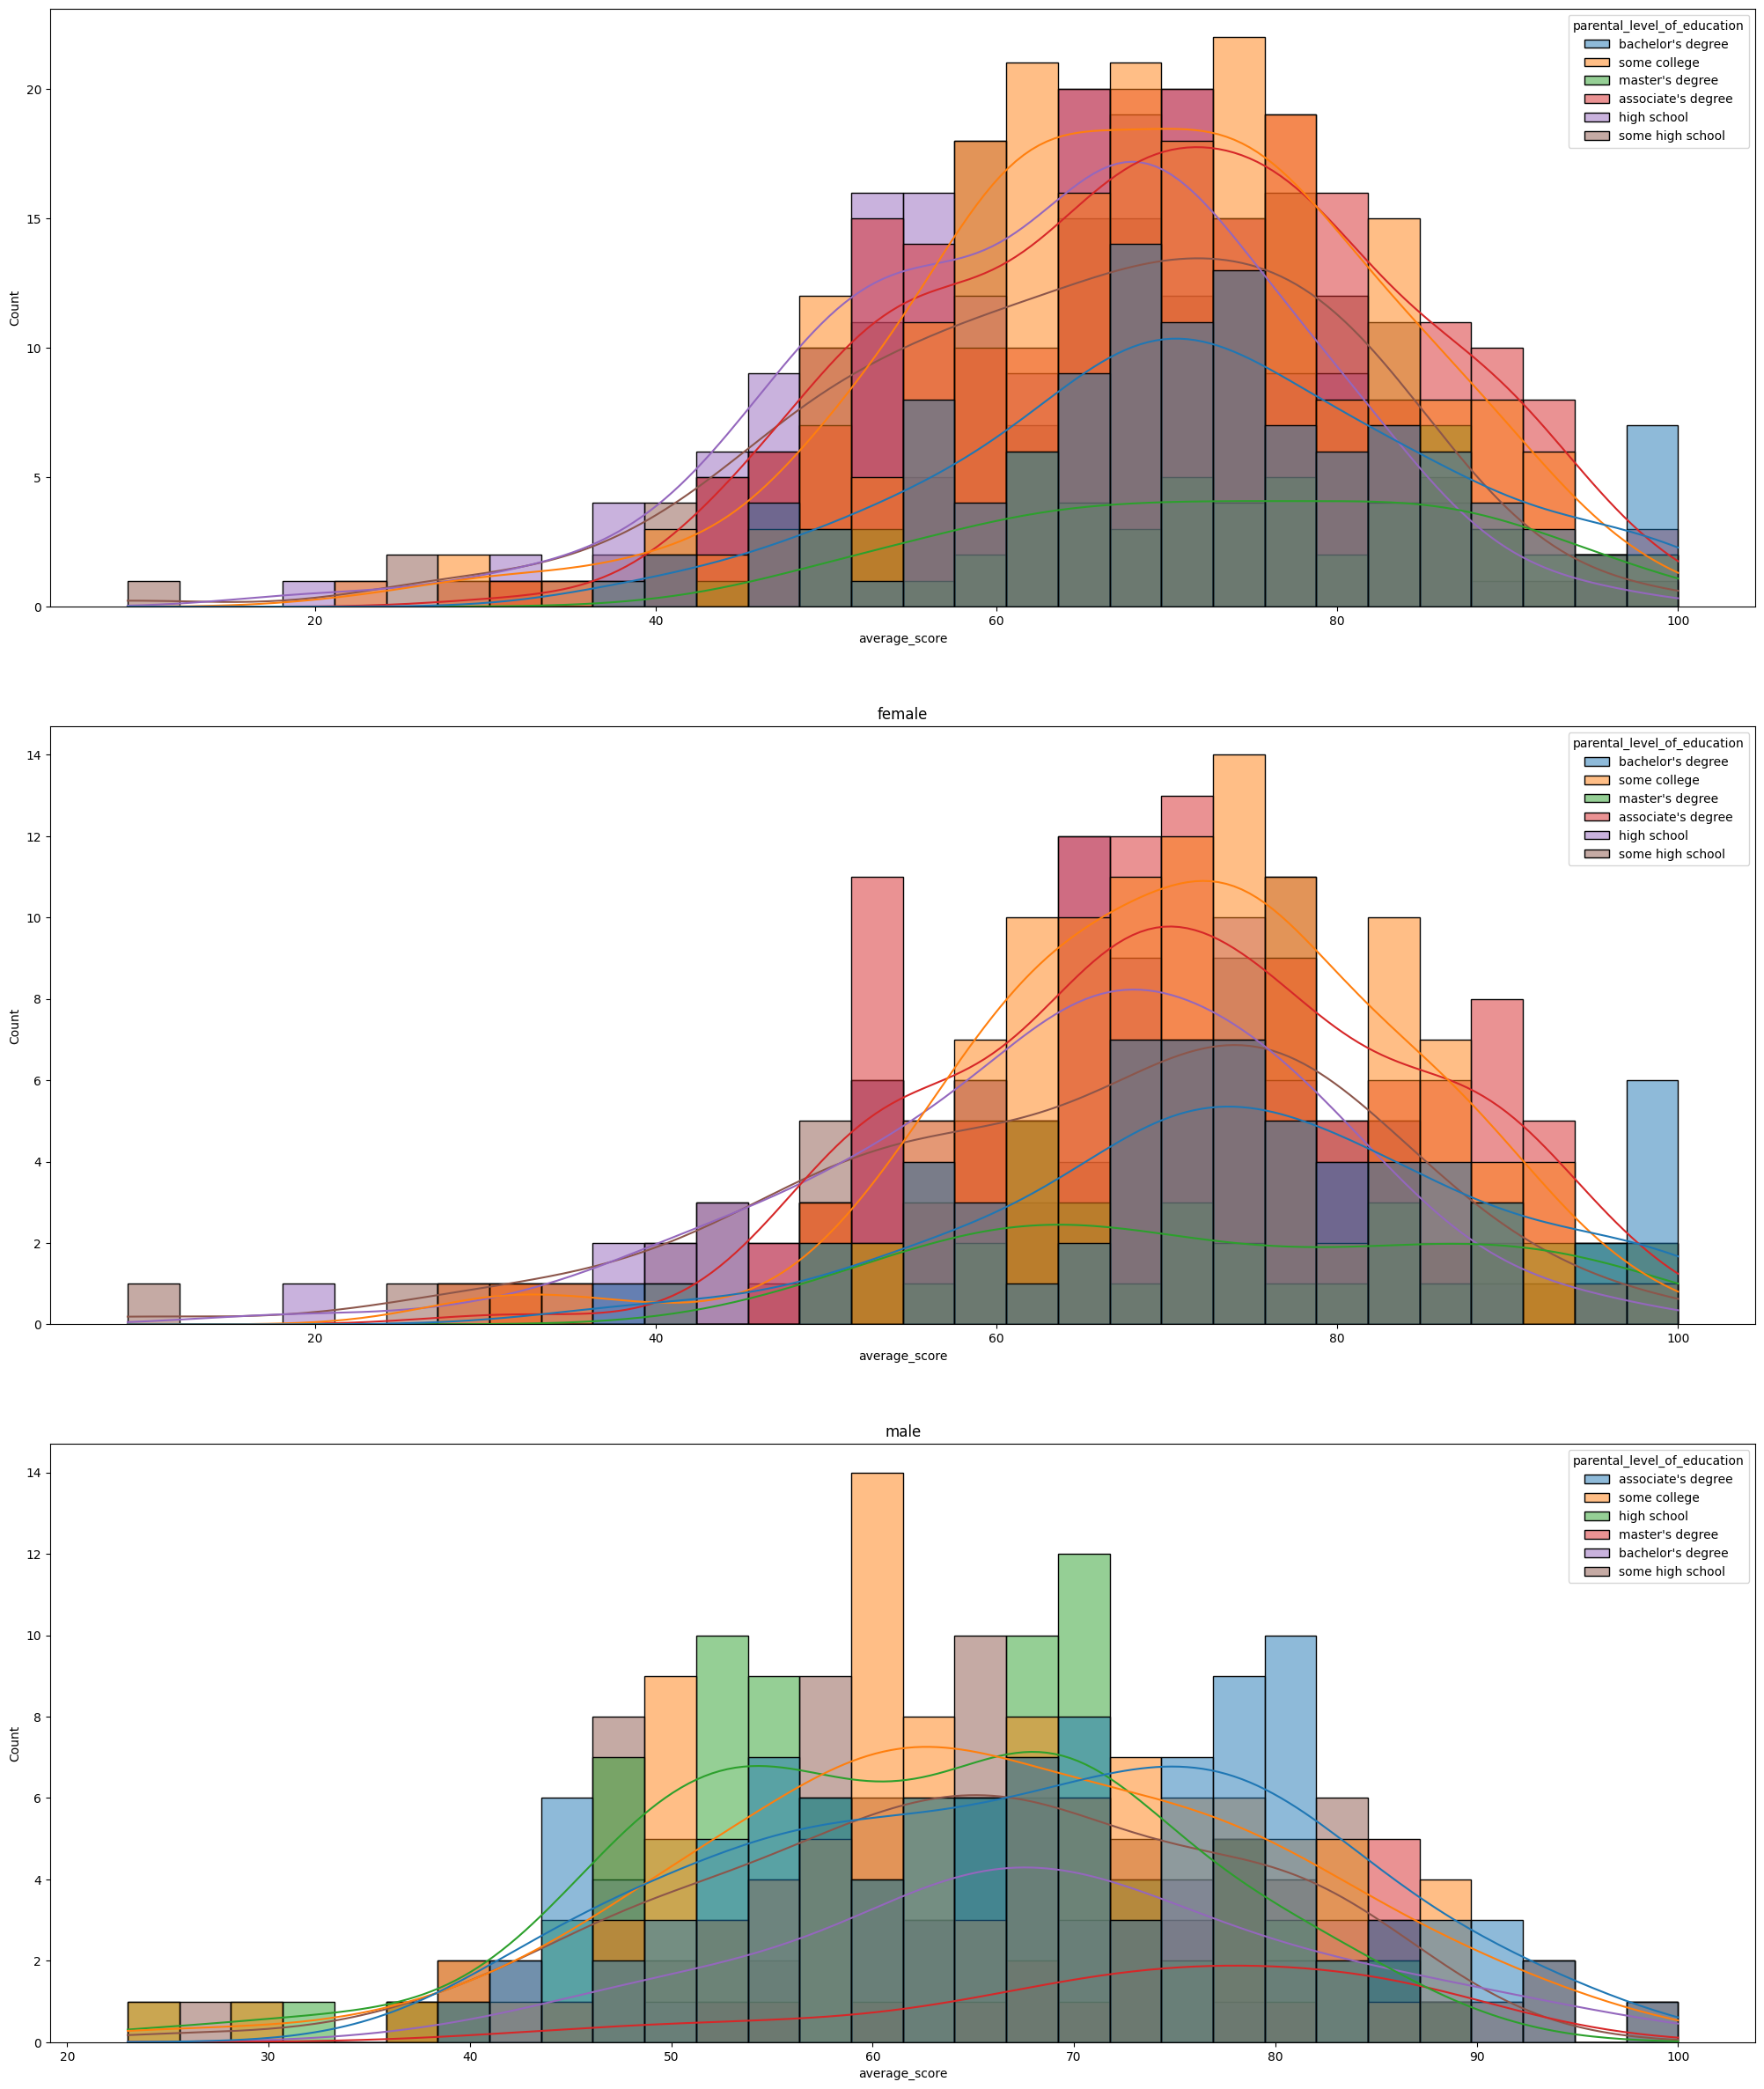

In [54]:
plt.subplots(3, 1, figsize=(25,30))

plt.subplot(311)
sns.histplot(data=df, x='average_score', bins=30, kde=True, hue='parental_level_of_education')

plt.subplot(312)
sns.histplot(data=df[df.gender=='female'], x='average_score', bins=30, kde=True, hue='parental_level_of_education')
plt.title('female')
plt.subplot(313)
sns.histplot(data=df[df.gender=='male'], x='average_score', bins=30, kde=True, hue='parental_level_of_education')
plt.title('male')